In [0]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import operator
from statistics import mean,pstdev
import numpy as np
import random
import copy
import math

In [0]:
path="movies_dataset/"
ratings_path=path+"ratings.csv"
movies_path=path+"movies.csv"

In [0]:
ratings_df=pd.read_csv(ratings_path)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movie_indices=[]
inverse_movie_map={}
movies_df=pd.read_csv(movies_path)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings_matrix_train=np.load('./ratings_matrix_train.npy')
train_nos=np.load('./train_nos.npy')
test_nos=np.load('./test_nos.npy')

In [0]:
correct_predictions=[]
for i in test_nos:
    correct_predictions.append(ratings_df['rating'][i])

In [0]:
def mean_with_nan(list_a):
    count=0
    sum=0.0
    for i in list_a:
        if not np.isnan(i):
            #print(i)
            count+=1
            sum+=i
    #print(sum) 
    if(count==0):
        return 0
    return sum/count     

In [0]:
for i in range(len(movies_df)):
    movie_indices.append(movies_df['movieId'][i])
    inverse_movie_map[movies_df['movieId'][i]]=i
number_of_items=len(movie_indices)

In [0]:
number_of_users={}
for i in range(len(ratings_df)):
    number_of_users[ratings_df['userId'][i]]=1
number_of_users=len(number_of_users)

In [0]:
ratings_matrix = np.zeros((number_of_users,number_of_items))
ratings_matrix = copy.deepcopy(ratings_matrix_train)
cnt=0
for i in range(number_of_users):
    mean = mean_with_nan(ratings_matrix_train[i])
    for j in range(number_of_items):
        if np.isnan(ratings_matrix[i][j]):
            ratings_matrix[i][j]=mean

In [0]:
#obtaining eigen values with the help of svd
u,sigma,v = np.linalg.svd(ratings_matrix,full_matrices=True)

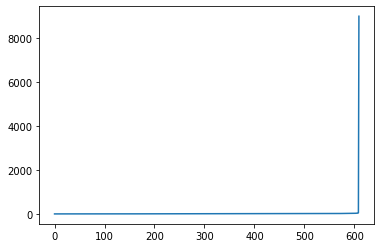

In [0]:
sigma.sort()
plt.plot(sigma)

In [0]:
print(np.mean(sigma))
x = np.mean(sigma)
cnt=0
for i in range(len(sigma)):
    if sigma[i]>5:
        cnt+=1
print(cnt)

22.47786993225202
346


In [0]:
k=346

In [0]:
def rmse_error(a,b):# a and b are lists
    error_sum=0.0
    for i in range(len(a)):
        error_sum+=(a[i]-b[i])*(a[i]-b[i])
    error_sum/=len(a)
    return np.sqrt(error_sum)  

In [0]:
#batch gradient descent:
def batch_gradient_descent(r_m,rows,cols,iterations,alpha):
    u = np.random.rand(rows,k)
    v = np.random.rand(cols,k)
    e = np.zeros((rows,cols))
    for i in range(iterations):
        e = r_m - np.dot(u,np.transpose(v))
        if i%100==0:
            print("i: "+str(i)+' '+str(np.linalg.norm(e,ord='fro')))
        u = u + alpha*(np.dot(e,v))
        v = v + alpha*(np.dot(np.transpose(e),u))
    return u,v

In [0]:
u_bgd,v_bgd = batch_gradient_descent(ratings_matrix,number_of_users,number_of_items,10000000,1e-7)

i: 0 202236.3154191779
i: 100 3766.504551684688
i: 200 3732.127800667563
i: 300 3698.4924416547
i: 400 3665.2740066811075
i: 500 3632.464868014768
i: 600 3600.057600793697
i: 700 3568.0449759336934
i: 800 3536.4199533572732
i: 900 3505.1756755077354
i: 1000 3474.305461134292
i: 1100 3443.8027993349856
i: 1200 3413.661343844871
i: 1300 3383.874907557602
i: 1400 3354.437457269269
i: 1500 3325.3431086338987
i: 1600 3296.5861213206645
i: 1700 3268.160894363311
i: 1800 3240.061961692873
i: 1900 3212.2839878452396
i: 2000 3184.821763835525
i: 2100 3157.6702031916443
i: 2200 3130.824338139923
i: 2300 3104.279315935891
i: 2400 3078.030395333797
i: 2500 3052.0729431886866
i: 2600 3026.4024311852363
i: 2700 3001.0144326877694
i: 2800 2975.904619706233
i: 2900 2951.0687599731014
i: 3000 2926.5027141264736
i: 3100 2902.2024329948367
i: 3200 2878.163954979202
i: 3300 2854.3834035285267
i: 3400 2830.856984704495
i: 3500 2807.5809848320055
i: 3600 2784.5517682317864
i: 3700 2761.7657750317817
i: 3800

KeyboardInterrupt: 

In [0]:
np.save('u1',u1)
np.save('v1',v1)

NameError: name 'u1' is not defined

In [0]:
def stochastic_gradient_descent(r_m,rows,cols,iterations,alpha):
    u = np.random.rand(rows,k)
    v = np.random.rand(cols,k)
    e = np.zeros((rows,cols))
    for i1 in range(iterations):
        for i in range(rows):
            for j in range(cols):
                if r_m[i][j]!=0:
                    e[i][j]=r_m[i][j]-np.dot(u[i],np.transpose(v[j]))
                    for q in range(k):
                        u_temp[i][q]=u[i][q]+alpha*e[i][j]*v[j][q]
                    for q in range(k):
                        v_temp[j][q]=v[j][q]+alpha*e[i][j]*u[i][q]
                    for q in range(k):
                        u[i][q]=u_temp[i][q]
                        v[j][q]=v_temp[j][q]
                if i1%5==0:
                    print("i1: "+str(i1)+' '+np.linalg.norm(e,ord='fro'))

In [0]:
print(test_nos[0])

0


In [0]:
import math
s=0
s1=0
cnt=0
for i in range(rows):
    for j in range(cols):
        if test_mat[i][j]>0:
            x = np.dot(u1[i],np.transpose(v1[j]))
            y = test_mat[i][j]-x
            s1 = s1+abs(y)
            y = y*y
            s = s+y
            cnt=cnt+1
s=s/cnt
s = math.sqrt(s)
s1=s1/cnt

In [0]:
#gd with regularization
# def gd_regularized(r_m,rows,cols,iterations,alpha,reg_param):
#     u = np.random.rand(rows,k)
#     v = np.random.rand(cols,k)
#     e = np.zeros((rows,cols))
#     for i in range(iterations):
#         e_mat4 = r_m - np.dot(u_mat4,np.transpose(v_mat4))
#         if i%5==0:
#             print('i: '+str(i)+' '+np.linalg.norm(e,ord='fro'))
#         u = u*(1-alpha*reg_param) + alpha*(np.dot(e,v))
#         v = v*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e),u))

In [0]:
#gradient descent with user and item biases and regularization
def gd_reg_bias(r_m,rows,cols,iterations,alpha,reg_param):
    u = np.random.rand(rows,k+2)
    v = np.random.rand(cols,k+2)
    for i in range(rows):
        u[i][k]=1
    for i in range(cols):
        v[i][k]=1
    e = np.zeros((rows,cols))
    for _iter in range(1000):
        e = r_m - np.dot(u,np.transpose(v))
        if _iter%10==0:
            print("num of iterations: "+str(_iter))
            print(np.linalg.norm(e,ord='fro'))
        u = u*(1-alpha*_lambda) + alpha*(np.dot(e,v))
        for i in range(rows):
            u[i][k]=1
        v = v*(1-alpha*_lambda) + alpha*(np.dot(np.transpose(e),u))
        for i in range(cols):
            v[i][k]=1

In [0]:
random.shuffle(train_nos)

In [0]:
length = len(train_nos)
p1 = copy.deepcopy(ratings_matrix)
p2 = copy.deepcopy(ratings_matrix)
p3 = copy.deepcopy(ratings_matrix)
p4 = copy.deepcopy(ratings_matrix)
p5 = copy.deepcopy(ratings_matrix)
for i in  range(0,length//5):#first 1/5 is the test set
    p1[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range(length//5,(2*length)//5):#second 1/5 is the test set
    p2[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range((2*length)//5,(3*length)//5):#third 1/5 is the test set
    p3[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range((3*length)//5,(4*length)//5):#fourth 1/5 is the test set
    p4[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0
for i in range((4*length)//5,(5*length)//5):#fifth 1/5 is the test set
    p5[ratings_df['userId'][i]][inverse_movie_map[ratings_df['movieId'][i]]]=0

In [0]:
reg_param = 35

In [0]:
alpha = 1e-7

In [0]:
#case1:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p1 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))

num of iterations: 0
103.4972807869632
num of iterations: 10
42.840490729594556
num of iterations: 20
18.521554161816145
num of iterations: 30
8.077696185014593
num of iterations: 40
3.5843530982360554
num of iterations: 50
2.0166843872861504
num of iterations: 60
1.6432017241616554
num of iterations: 70
1.5673964166673275
num of iterations: 80
1.5517317148632097
num of iterations: 90
1.547613347396802


In [0]:
#case1 error:
err1=0
n=0
for i in range(0,length//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err1 += diff
        n += 1
if n==0:
    err1=0
else:
    err1=math.sqrt(err1/n)
print(err1)

1.7952242662097118


In [0]:
#case2:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p2 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))

num of iterations: 0
103.43410967111451
num of iterations: 10
42.84307748883951
num of iterations: 20
18.534845121341046
num of iterations: 30
8.088867484641266
num of iterations: 40
3.5905658417591058
num of iterations: 50
2.0171694341152984
num of iterations: 60
1.6411797584048817
num of iterations: 70
1.5645718249411342
num of iterations: 80
1.5486548152591912
num of iterations: 90
1.54445421215528


In [0]:
#case2 error:
err2=0
n=0
for i in range(length//5,(2*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err2 += diff
        n += 1
if n==0:
    err2=0
else:
    err2=math.sqrt(err1/n)
print(err2)

0.04831657990421836


In [0]:
#case3:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p3 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))
#case2 error:
err3=0
n=0
for i in range((2*length)//5,(3*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err3 += diff
        n += 1
if n==0:
    err3=0
else:
    err3=math.sqrt(err1/n)
print(err3)

num of iterations: 0
103.57277336913533
num of iterations: 10
42.89351628265257
num of iterations: 20
18.55554071431159
num of iterations: 30
8.097559343718986
num of iterations: 40
3.59412835435279
num of iterations: 50
2.0178905290640325
num of iterations: 60
1.6411181266997905
num of iterations: 70
1.5644231537464208
num of iterations: 80
1.5485414085162585
num of iterations: 90
1.5443731490131611
0.03984080019331883


In [0]:
#case4:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p4 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))
#case4 error:
err4=0
n=0
for i in range((3*length)//5,(4*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err4 += diff
        n += 1
if n==0:
    err4=0
else:
    err4=math.sqrt(err1/n)
print(err4)

num of iterations: 0
103.428323574191
num of iterations: 10
42.84652013925748
num of iterations: 20
18.538963973807345
num of iterations: 30
8.091833352550156
num of iterations: 40
3.592409500765455
num of iterations: 50
2.0182006193970454
num of iterations: 60
1.6420608418447404
num of iterations: 70
1.5655038308642089
num of iterations: 80
1.549696252768648
num of iterations: 90
1.5455479393509854
0.04524385046390424


In [0]:
#case5:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p5 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))
#case4 error:
err5=0
n=0
for i in range((3*length)//5,(4*length)//5):
    x = ratings_df['userId'][i]
    y = inverse_movie_map[ratings_df['movieId'][i]]
    actual = ratings_matrix_train[x][y]
    if np.isnan(actual)==False:
        pred = np.dot(u2[x],np.transpose(v2[y]))
        diff = pred-actual
        diff = diff*diff
        err5 += diff
        n += 1
if n==0:
    err5=0
else:
    err5=math.sqrt(err1/n)
print(err5)

num of iterations: 0
103.53809348083115
num of iterations: 10
42.8320176013058
num of iterations: 20
18.506975172541097
num of iterations: 30
8.066452119921667
num of iterations: 40
3.5776364788764314
num of iterations: 50
2.013538850629031
num of iterations: 60
1.6410225392596482
num of iterations: 70
1.5653079802188163
num of iterations: 80
1.5496269524672182
num of iterations: 90
1.5454820250461418
0.04524385046390424


In [0]:
avg = (err1+err2+err3+err4+err5)/5
print(avg)

0.39477386944701154


In [0]:
reg_param avg
2 0.40193155365284633
5 0.3987769015126784
10 0.39639918551247166
25 0.3941284325416964
35 0.39477386944701154
50 0.4077619971468356
100 0.40115566745508746
200 0.39375657175193746
chosen value of reg_param = 25

In [0]:
iterations = 10000000

In [0]:
u_reg = np.random.rand(number_of_users,k)
v_reg = np.random.rand(number_of_items,k)
e_reg = np.zeros((number_of_users,number_of_items))
for i in range(iterations):
    e_reg = ratings_matrix - np.dot(u_reg,np.transpose(v_reg))
    if i%10==0:
        print("i: "+str(i)+' '+str(np.linalg.norm(e_reg,ord='fro')))
    u_reg = u_reg*(1-alpha*reg_param) + alpha*(np.dot(e_reg,v_reg))
    v_reg = v_reg*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e_reg),u_reg))

i: 0 202206.11798274473
i: 10 83801.0931762597
i: 20 36409.17514346159
i: 30 16249.476950806371
i: 40 7875.11449286201
i: 50 4833.492546590786
i: 60 3992.3496746547185
i: 70 3807.1761172405672
i: 80 3767.716861250019
i: 90 3757.153033777028
i: 100 3752.1657803045237
i: 110 3748.2500477605176
i: 120 3744.5422713166163
i: 130 3740.8776670661823
i: 140 3737.225040027414
i: 150 3733.5785887946618
i: 160 3729.9372771795515
i: 170 3726.3009358229
i: 180 3722.6695407522134
i: 190 3719.0430866950046
i: 200 3715.421567940506
i: 210 3711.804976939271
i: 220 3708.193305031689
i: 230 3704.5865430252284
i: 240 3700.9846814970565
i: 250 3697.3877109361943
i: 260 3693.795621807646
i: 270 3690.2084045808015
i: 280 3686.6260497419275
i: 290 3683.0485477995817
i: 300 3679.475889286954
i: 310 3675.908064762829
i: 320 3672.3450648119574
i: 330 3668.786880045164
i: 340 3665.233501099338
i: 350 3661.68491863738
i: 360 3658.1411233481294
i: 370 3654.602105946254
i: 380 3651.0678571721915
i: 390 3647.53836779

i: 3140 2830.3816679408683
i: 3150 2827.8851042442475
i: 3160 2825.391474463323
i: 3170 2822.9007739559647
i: 3180 2820.4129980902985
i: 3190 2817.9281422446807
i: 3200 2815.446201807663
i: 3210 2812.967172177965
i: 3220 2810.491048764445
i: 3230 2808.0178269860694
i: 3240 2805.5475022718792
i: 3250 2803.080070060971
i: 3260 2800.6155258024532
i: 3270 2798.1538649554313
i: 3280 2795.695082988967
i: 3290 2793.239175382053
i: 3300 2790.786137623589
i: 3310 2788.3359652123477
i: 3320 2785.8886536569416
i: 3330 2783.444198475806
i: 3340 2781.0025951971625
i: 3350 2778.563839358989
i: 3360 2776.127926508997
i: 3370 2773.6948522046005
i: 3380 2771.2646120128875
i: 3390 2768.837201510593
i: 3400 2766.4126162840676
i: 3410 2763.9908519292576
i: 3420 2761.57190405167
i: 3430 2759.1557682663433
i: 3440 2756.7424401978305
i: 3450 2754.3319154801593
i: 3460 2751.9241897568145
i: 3470 2749.5192586807016
i: 3480 2747.117117914128
i: 3490 2744.7177631287705
i: 3500 2742.3211900056535
i: 3510 2739.927

i: 6240 2177.423735775172
i: 6250 2175.6554898777513
i: 6260 2173.8891146054384
i: 6270 2172.124607455791
i: 6280 2170.3619659308724
i: 6290 2168.6011875372396
i: 6300 2166.842269785935
i: 6310 2165.085210192473
i: 6320 2163.33000627683
i: 6330 2161.576655563435
i: 6340 2159.8251555811576
i: 6350 2158.0755038633
i: 6360 2156.327697947581
i: 6370 2154.5817353761313
i: 6380 2152.8376136954803
i: 6390 2151.0953304565455
i: 6400 2149.3548832146244
i: 6410 2147.616269529379
i: 6420 2145.879486964834
i: 6430 2144.144533089355
i: 6440 2142.4114054756487
i: 6450 2140.6801017007474
i: 6460 2138.9506193459997
i: 6470 2137.2229559970588
i: 6480 2135.497109243878
i: 6490 2133.773076680694
i: 6500 2132.0508559060163
i: 6510 2130.330444522627
i: 6520 2128.6118401375575
i: 6530 2126.895040362088
i: 6540 2125.180042811733
i: 6550 2123.4668451062344
i: 6560 2121.7554448695487
i: 6570 2120.0458397298376
i: 6580 2118.338027319461
i: 6590 2116.632005274963
i: 6600 2114.9277712370636
i: 6610 2113.225322850

i: 9320 1710.623398579175
i: 9330 1709.3313759085825
i: 9340 1708.0406239695624
i: 9350 1706.751141260556
i: 9360 1705.462926282306
i: 9370 1704.1759775378453
i: 9380 1702.8902935324975
i: 9390 1701.605872773867
i: 9400 1700.3227137718425
i: 9410 1699.040815038584
i: 9420 1697.7601750885242
i: 9430 1696.4807924383613
i: 9440 1695.2026656070534
i: 9450 1693.9257931158172
i: 9460 1692.650173488121
i: 9470 1691.3758052496826
i: 9480 1690.1026869284615
i: 9490 1688.8308170546568
i: 9500 1687.5601941607028
i: 9510 1686.2908167812632
i: 9520 1685.0226834532284
i: 9530 1683.7557927157093
i: 9540 1682.490143110035
i: 9550 1681.2257331797448
i: 9560 1679.9625614705885
i: 9570 1678.7006265305197
i: 9580 1677.439926909689
i: 9590 1676.1804611604452
i: 9600 1674.922227837326
i: 9610 1673.6652254970568
i: 9620 1672.4094526985443
i: 9630 1671.154908002873
i: 9640 1669.9015899733013
i: 9650 1668.649497175257
i: 9660 1667.3986281763327
i: 9670 1666.1489815462826
i: 9680 1664.9005558570148
i: 9690 1663

i: 12300 1375.940620937623
i: 12310 1374.969573869898
i: 12320 1373.9994348773923
i: 12330 1373.0302029813984
i: 12340 1372.0618772045314
i: 12350 1371.0944565707255
i: 12360 1370.127940105231
i: 12370 1369.1623268346127
i: 12380 1368.197615786748
i: 12390 1367.2338059908234
i: 12400 1366.2708964773333
i: 12410 1365.308886278079
i: 12420 1364.347774426162
i: 12430 1363.3875599559867
i: 12440 1362.4282419032552
i: 12450 1361.4698193049671
i: 12460 1360.5122911994154
i: 12470 1359.5556566261853
i: 12480 1358.5999146261513
i: 12490 1357.6450642414763
i: 12500 1356.691104515607
i: 12510 1355.7380344932756
i: 12520 1354.7858532204923
i: 12530 1353.8345597445486
i: 12540 1352.8841531140122
i: 12550 1351.9346323787227
i: 12560 1350.9859965897945
i: 12570 1350.0382447996105
i: 12580 1349.0913760618232
i: 12590 1348.1453894313486
i: 12600 1347.200283964368
i: 12610 1346.2560587183218
i: 12620 1345.3127127519135
i: 12630 1344.3702451250988
i: 12640 1343.4286548990915
i: 12650 1342.4879411363572


i: 15260 1124.3459803405306
i: 15270 1123.606011668836
i: 15280 1122.8667106423086
i: 15290 1122.1280765914269
i: 15300 1121.3901088474868
i: 15310 1120.6528067425977
i: 15320 1119.9161696096849
i: 15330 1119.1801967824842
i: 15340 1118.4448875955457
i: 15350 1117.7102413842265
i: 15360 1116.976257484695
i: 15370 1116.2429352339261
i: 15380 1115.5102739697024
i: 15390 1114.7782730306096
i: 15400 1114.046931756041
i: 15410 1113.316249486189
i: 15420 1112.5862255620489
i: 15430 1111.8568593254176
i: 15440 1111.1281501188896
i: 15450 1110.400097285858
i: 15460 1109.6727001705121
i: 15470 1108.9459581178369
i: 15480 1108.2198704736115
i: 15490 1107.4944365844096
i: 15500 1106.7696557975942
i: 15510 1106.045527461321
i: 15520 1105.3220509245336
i: 15530 1104.5992255369654
i: 15540 1103.877050649135
i: 15550 1103.155525612349
i: 15560 1102.4346497786964
i: 15570 1101.7144225010516
i: 15580 1100.9948431330697
i: 15590 1100.275911029188
i: 15600 1099.557625544624
i: 15610 1098.8399860353718
i:

i: 18260 929.5641122162056
i: 18270 928.9976738627338
i: 18280 928.4317340259481
i: 18290 927.8662922340901
i: 18300 927.3013480159304
i: 18310 926.7369009007632
i: 18320 926.1729504184094
i: 18330 925.6094960992144
i: 18340 925.0465374740462
i: 18350 924.484074074298
i: 18360 923.9221054318828
i: 18370 923.3606310792376
i: 18380 922.7996505493182
i: 18390 922.2391633756023
i: 18400 921.679169092086
i: 18410 921.1196672332844
i: 18420 920.5606573342309
i: 18430 920.0021389304757
i: 18440 919.4441115580859
i: 18450 918.8865747536438
i: 18460 918.329528054248
i: 18470 917.7729709975107
i: 18480 917.2169031215572
i: 18490 916.6613239650277
i: 18500 916.1062330670729
i: 18510 915.5516299673559
i: 18520 914.9975142060499
i: 18530 914.4438853238393
i: 18540 913.8907428619176
i: 18550 913.3380863619867
i: 18560 912.7859153662567
i: 18570 912.2342294174448
i: 18580 911.6830280587757
i: 18590 911.1323108339794
i: 18600 910.5820772872909
i: 18610 910.0323269634495
i: 18620 909.4830594076997
i: 1

i: 21310 777.8745048377289
i: 21320 777.4404740782466
i: 21330 777.0068193201519
i: 21340 776.573540223314
i: 21350 776.1406364479518
i: 21360 775.7081076546353
i: 21370 775.2759535042823
i: 21380 774.8441736581597
i: 21390 774.4127677778828
i: 21400 773.9817355254157
i: 21410 773.5510765630685
i: 21420 773.1207905534995
i: 21430 772.6908771597132
i: 21440 772.2613360450595
i: 21450 771.8321668732352
i: 21460 771.4033693082814
i: 21470 770.9749430145841
i: 21480 770.5468876568749
i: 21490 770.1192029002274
i: 21500 769.6918884100594
i: 21510 769.2649438521328
i: 21520 768.8383688925502
i: 21530 768.4121631977582
i: 21540 767.9863264345436
i: 21550 767.5608582700357
i: 21560 767.1357583717036
i: 21570 766.7110264073572
i: 21580 766.2866620451471
i: 21590 765.8626649535619
i: 21600 765.4390348014305
i: 21610 765.0157712579205
i: 21620 764.5928739925369
i: 21630 764.170342675123
i: 21640 763.7481769758598
i: 21650 763.3263765652646
i: 21660 762.904941114191
i: 21670 762.4838702938299
i: 2

i: 24370 661.1151928533903
i: 24380 660.7818545125427
i: 24390 660.4488025270673
i: 24400 660.1160366458446
i: 24410 659.7835566179965
i: 24420 659.4513621928826
i: 24430 659.1194531201028
i: 24440 658.7878291494947
i: 24450 658.456490031135
i: 24460 658.1254355153391
i: 24470 657.7946653526593
i: 24480 657.4641792938861
i: 24490 657.1339770900474
i: 24500 656.8040584924083
i: 24510 656.4744232524698
i: 24520 656.1450711219705
i: 24530 655.8160018528849
i: 24540 655.4872151974233
i: 24550 655.1587109080314
i: 24560 654.8304887373914
i: 24570 654.5025484384196
i: 24580 654.174889764267
i: 24590 653.8475124683197
i: 24600 653.5204163041989
i: 24610 653.1936010257573
i: 24620 652.8670663870842
i: 24630 652.5408121425004
i: 24640 652.2148380465603
i: 24650 651.8891438540519
i: 24660 651.5637293199951
i: 24670 651.2385941996428
i: 24680 650.9137382484789
i: 24690 650.5891612222202
i: 24700 650.2648628768143
i: 24710 649.9408429684406
i: 24720 649.6171012535088
i: 24730 649.2936374886602
i: 

i: 27420 571.6256601253009
i: 27430 571.3690476432879
i: 27440 571.112654832309
i: 27450 570.8564815028357
i: 27460 570.6005274655089
i: 27470 570.3447925311377
i: 27480 570.0892765107011
i: 27490 569.8339792153456
i: 27500 569.5789004563868
i: 27510 569.324040045308
i: 27520 569.069397793761
i: 27530 568.814973513565
i: 27540 568.5607670167072
i: 27550 568.306778115342
i: 27560 568.0530066217913
i: 27570 567.7994523485442
i: 27580 567.546115108256
i: 27590 567.2929947137501
i: 27600 567.0400909780153
i: 27610 566.7874037142072
i: 27620 566.5349327356473
i: 27630 566.2826778558236
i: 27640 566.03063888839
i: 27650 565.7788156471656
i: 27660 565.5272079461351
i: 27670 565.275815599449
i: 27680 565.0246384214222
i: 27690 564.7736762265348
i: 27700 564.5229288294322
i: 27710 564.2723960449238
i: 27720 564.0220776879834
i: 27730 563.7719735737492
i: 27740 563.5220835175237
i: 27750 563.2724073347728
i: 27760 563.0229448411267
i: 27770 562.7736958523784
i: 27780 562.5246601844849
i: 27790 5

i: 30470 502.7114879931076
i: 30480 502.5138205308003
i: 30490 502.31632199527354
i: 30500 502.11899224113006
i: 30510 501.9218311230968
i: 30520 501.7248384960234
i: 30530 501.5280142148825
i: 30540 501.33135813477
i: 30550 501.13487011090467
i: 30560 500.9385499986276
i: 30570 500.74239765340315
i: 30580 500.54641293081795
i: 30590 500.35059568658085
i: 30600 500.15494577652316
i: 30610 499.9594630565984
i: 30620 499.76414738288156
i: 30630 499.5689986115706
i: 30640 499.3740165989843
i: 30650 499.1792012015637
i: 30660 498.9845522758713
i: 30670 498.79006967859044
i: 30680 498.59575326652686
i: 30690 498.4016028966066
i: 30700 498.2076184258774
i: 30710 498.01379971150766
i: 30720 497.82014661078654
i: 30730 497.62665898112436
i: 30740 497.43333668005147
i: 30750 497.2401795652195
i: 30760 497.04718749439945
i: 30770 496.85436032548364
i: 30780 496.66169791648406
i: 30790 496.46920012553255
i: 30800 496.27686681088113
i: 30810 496.08469783090186
i: 30820 495.89269304408595
i: 30830 

i: 33460 450.5315802513719
i: 33470 450.37845200831873
i: 33480 450.2254542318104
i: 33490 450.0725868086163
i: 33500 449.9198496255989
i: 33510 449.7672425697144
i: 33520 449.6147655280131
i: 33530 449.46241838763837
i: 33540 449.3102010358263
i: 33550 449.1581133599071
i: 33560 449.00615524730364
i: 33570 448.85432658553236
i: 33580 448.7026272622019
i: 33590 448.5510571650146
i: 33600 448.3996161817654
i: 33610 448.2483042003419
i: 33620 448.09712110872437
i: 33630 447.94606679498577
i: 33640 447.7951411472919
i: 33650 447.6443440539003
i: 33660 447.49367540316155
i: 33670 447.34313508351795
i: 33680 447.1927229835047
i: 33690 447.04243899174844
i: 33700 446.89228299696816
i: 33710 446.7422548879752
i: 33720 446.5923545536719
i: 33730 446.44258188305315
i: 33740 446.2929367652053
i: 33750 446.14341908930635
i: 33760 445.99402874462595
i: 33770 445.8447656205256
i: 33780 445.6956296064572
i: 33790 445.546620591965
i: 33800 445.3977384666841
i: 33810 445.2489831203409
i: 33820 445.100

i: 36460 409.9695581294971
i: 36470 409.85088365600177
i: 36480 409.7323095488438
i: 36490 409.61383571964615
i: 36500 409.4954620801047
i: 36510 409.3771885419891
i: 36520 409.2590150171416
i: 36530 409.14094141747745
i: 36540 409.0229676549848
i: 36550 408.9050936417246
i: 36560 408.7873192898311
i: 36570 408.66964451151057
i: 36580 408.55206921904255
i: 36590 408.4345933247791
i: 36600 408.31721674114465
i: 36610 408.19993938063624
i: 36620 408.0827611558234
i: 36630 407.9656819793481
i: 36640 407.84870176392474
i: 36650 407.7318204223398
i: 36660 407.61503786745214
i: 36670 407.4983540121928
i: 36680 407.38176876956504
i: 36690 407.2652820526438
i: 36700 407.1488937745766
i: 36710 407.03260384858254
i: 36720 406.91641218795235
i: 36730 406.80031870604955
i: 36740 406.6843233163085
i: 36750 406.5684259322356
i: 36760 406.4526264674091
i: 36770 406.33692483547907
i: 36780 406.2213209501662
i: 36790 406.1058147252638
i: 36800 405.990406074636
i: 36810 405.8750949122184
i: 36820 405.75

KeyboardInterrupt: 

In [0]:
#finding rmse error after regularized gd:

np.save('u_reg',u_reg)
np.save('v_reg',v_reg)

In [0]:
missing_entries =[]
for i in range(number_of_users):
    for j in range(number_of_items):
        if np.isnan(ratings_matrix_train[i][j])==True:
            missing_entries.append((i,j))

In [0]:
#svd
prev = copy.deepcopy(ratings_matrix)
curr = copy.deepcopy(ratings_matrix)
for i in range(iterations):
    q,sigma,p_t = np.linalg.svd(curr)
    q = q[:,:k]
    sigma = np.diag(sigma)
    sigma = sigma[:k,:k]
    p_t = p_t[:k,:]
    prev = copy.deepcopy(curr)
    n=0
    temp = np.dot(np.dot(q,sigma),p_t)
    for j in range(len(missing_entries)):
        x1 = missing_entries[j][0]
        y1 = missing_entries[j][1]
        curr[x1][y1]=temp[x1][y1]
    e_svd = prev-curr
    if i%5==0:
        print('i: '+str(i)+' '+str(np.linalg.norm(e_svd,ord='fro')))

i: 0 35.09566056163375
i: 5 3.6151448732168032
i: 10 0.731507502664977
i: 15 0.25597074518863105
i: 20 0.10928906599177246
i: 25 0.050362784659603664
i: 30 0.027224441974464324
i: 35 0.01757658992026923
i: 40 0.012629989012554044
i: 45 0.009498012412977711
i: 50 0.0072685553339967715
i: 55 0.005601184551158091
i: 60 0.004329356583661994
i: 65 0.0033512026071711755
i: 70 0.0025960830368531034


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt: 

In [0]:
#finding the error
result_svd = np.dot(np.dot(q,sigma),p_t)
svd_err=0
n=0
for i in range(len(test_nos)):
    x1 = ratings_df['userId'][i]
    y1 = inverse_movie_map[ratings_df['movieId'][i]]
    if np.isnan(ratings_matrix_train[x1][y1])==False:
        x = result_svd[x1][y1]
        y = ratings_matrix[x1][y1]
        diff = x-y
        diff = diff*diff
        svd_err += diff
        n+=1
if n==0:
    svd_err=-1
else:
    svd_err = math.sqrt(svd_err/n)
print(svd_err)

2.5077909815956413e-06


In [0]:
np.save('q',q)
np.save('sigma',sigma)
np.save('p_t',p_t)

In [0]:
#case1:
u2 = np.random.rand(number_of_users,k)
v2 = np.random.rand(number_of_items,k)
w_mat=np.dot(ratings_matrix,ratings_matrix)
e2 = np.zeros((number_of_users,number_of_items))
for i in range(100):
    e2 = p1 - np.dot(u2,np.transpose(v2))
    if i%10==0:
        print("num of iterations: "+str(i))
        print(np.sum(np.absolute(e2))/(0.8*number_of_users*number_of_items))
    u2 = u2*(1-alpha*reg_param) + alpha*(np.dot(e2,v2))
    v2 = v2*(1-alpha*reg_param) + alpha*(np.dot(np.transpose(e2),u2))

In [0]:
for iters in range(iterations):
  error_mat=ratings_matrix-np.dot(u2,np.transpose(v2))
  if (iters%5==0):
    print("num of iterations: "+str(i))
    print(np.linalg.norm(error_mat,ird='fro')
    
    
      